In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

plt.style.use('default') 
plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
labels = pd.read_csv('train_labels.csv')
values = pd.read_csv('train_values.csv')
values = values.merge(labels)

Text(0, 0.5, 'Cantidad de edificaciones')

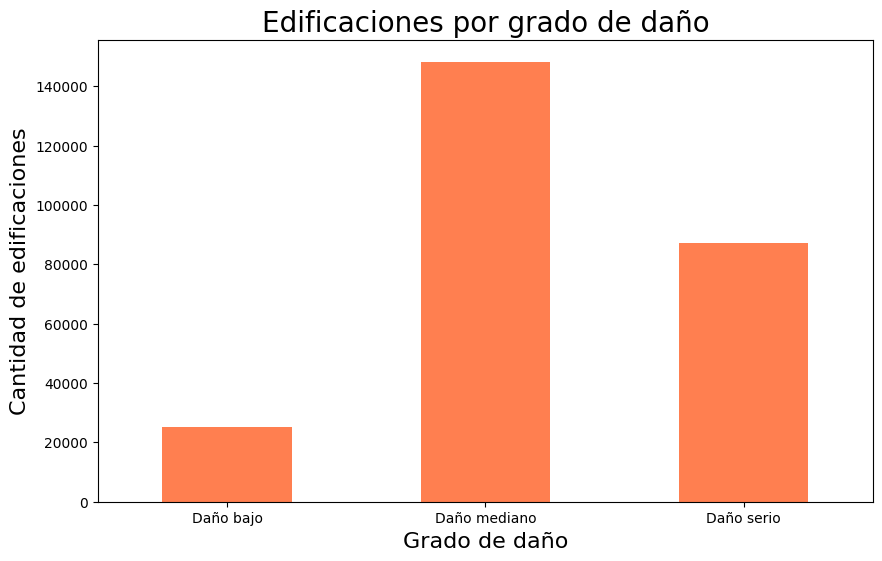

In [222]:
damage_grade_counts = values.damage_grade.value_counts()
# Ordeno y renombro los damage grades
damage_grade_counts = damage_grade_counts[[1, 2, 3]]
damage_grade_counts = damage_grade_counts.rename({1:'Daño bajo',
                                                  2:'Daño mediano',
                                                 3: 'Daño serio'})
g = damage_grade_counts.plot(kind='bar', linewidth=150, 
                         color='coral',figsize=(10,6), rot=0)
g.set_title('Edificaciones por grado de daño', fontsize=20)
g.set_xlabel('Grado de daño', fontsize=16)
g.set_ylabel('Cantidad de edificaciones', fontsize=16)

Text(220.72222222222223, 0.5, 'id de la region geográfica nivel 2 (agrupado)')

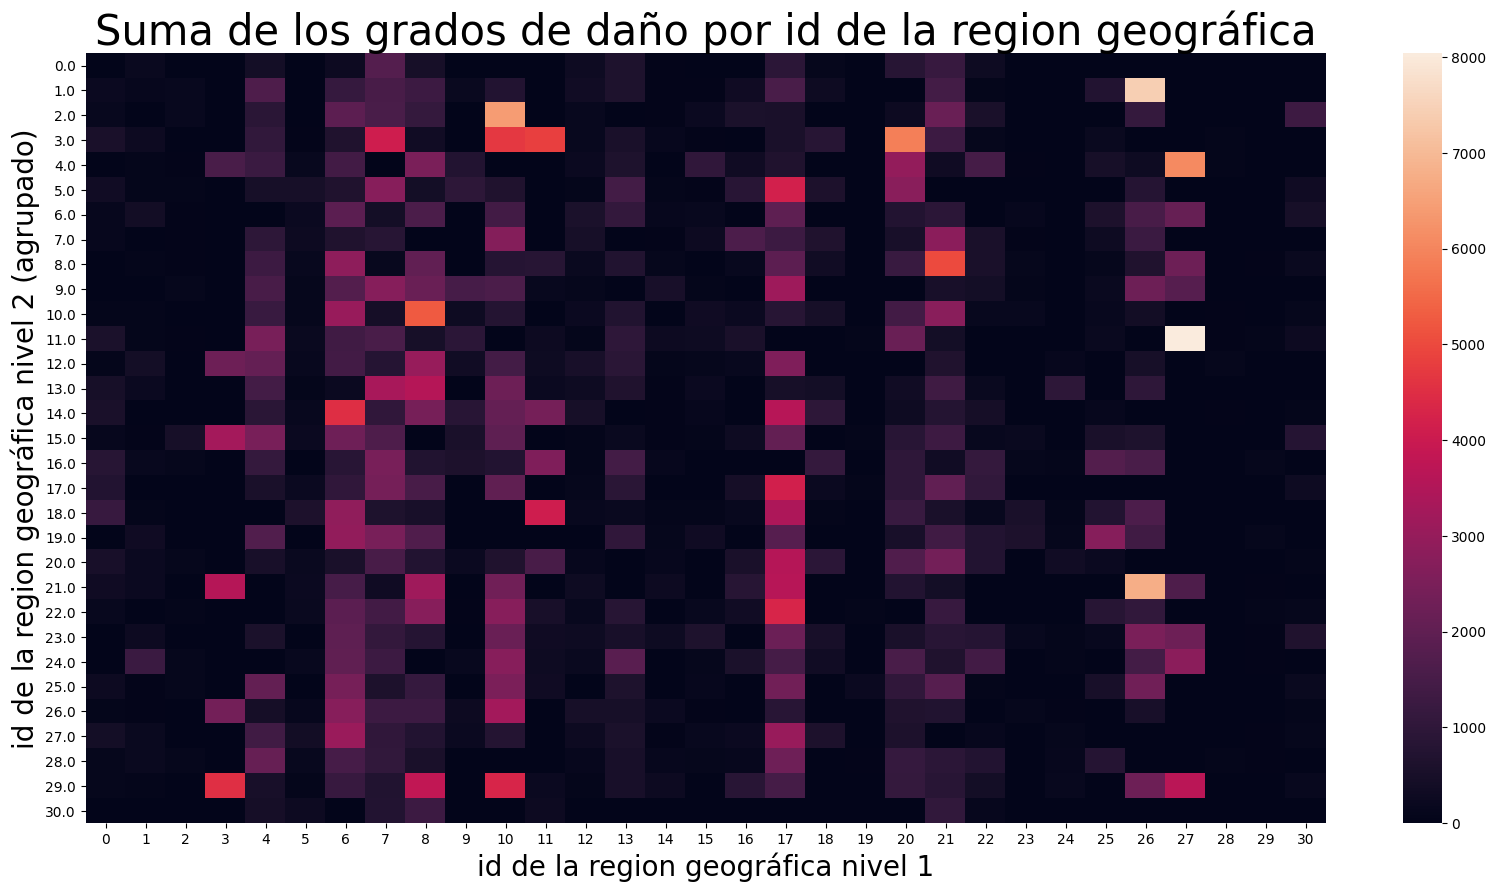

In [223]:
# Agrupo los valores de geo_level_2_id en 30 para que el grafico
# quede mas prolijo
values['geo_level_2_id_agrupados'] = round(values.geo_level_2_id / 48)
for_heatmap = values.pivot_table(index='geo_level_2_id_agrupados', 
                                 columns='geo_level_1_id', 
                                 values='damage_grade',
                                 aggfunc='sum')
for_heatmap = for_heatmap.fillna(0)
g = sns.heatmap(for_heatmap)
g.set_title("Suma de los grados de daño por id de la region geográfica",
            fontsize=30)
g.set_xlabel("id de la region geográfica nivel 1",fontsize=20)
g.set_ylabel("id de la region geográfica nivel 2 (agrupado)", fontsize=20)

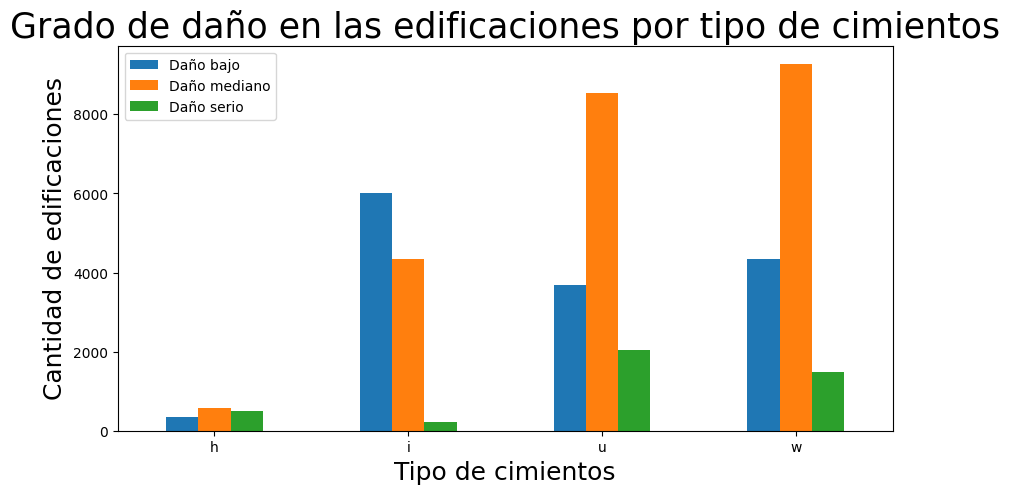

In [228]:
a = values[['damage_grade', 'foundation_type', 'geo_level_1_id']]
a = a.groupby(['damage_grade', 'foundation_type']).count()
a = a.unstack(0)
# Separo el tipo de cimiento r porque tiene una escala muy distinta a 
# las de los demas
g = a.loc[['h', 'i', 'u', 'w'],:].plot.bar(figsize=(10,5), rot=0)
g.set_title("Grado de daño en las edificaciones por tipo de cimientos",
            fontsize=25)
g.set_xlabel("Tipo de cimientos",fontsize=18)
g.set_ylabel("Cantidad de edificaciones", fontsize=18)
plt.legend(['Daño bajo','Daño mediano','Daño serio'])

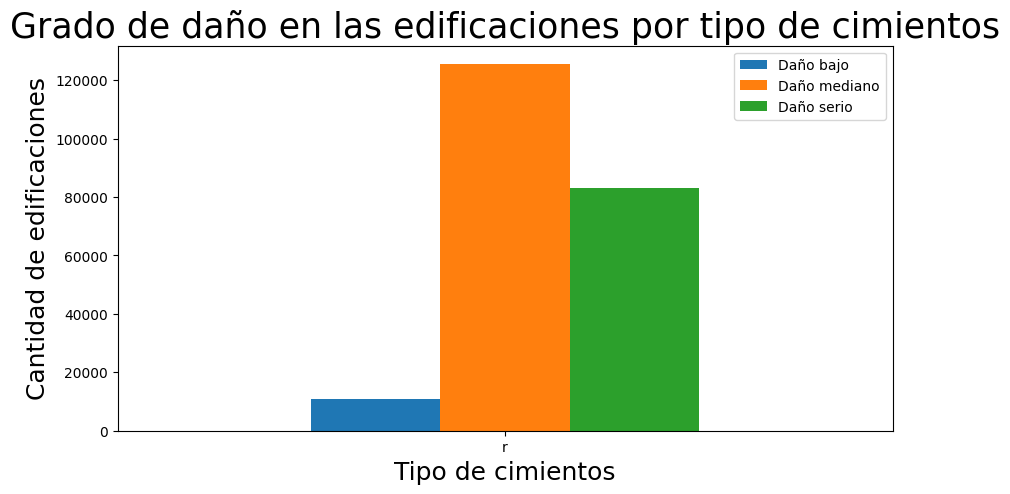

In [229]:
g = a.loc[['r'],:].plot.bar(figsize=(10,5), rot=0)
g.set_title("Grado de daño en las edificaciones por tipo de cimientos",
            fontsize=25)
g.set_xlabel("Tipo de cimientos",fontsize=18)
g.set_ylabel("Cantidad de edificaciones", fontsize=18)
plt.legend(['Daño bajo','Daño mediano','Daño serio'])

Concluciones los 2 graficos de arriba:
El tipo de fundacion 'i' es el unico que tiene una mayor cantidad de edificaciones con bajo daño que con los otros grados de daño. En los demas tipos de fundacion predomina el daño medio, que, como puede verse en el grafico de edificaciones por grado de daño, es el que predomina en general. Tambien, hay proporcionalmente muchas menos edificaciones de este tipo que recibieron daño serio. En este sentido, se puede decir que el tipo de fundacion 'i' tendio a ser el mas efectivo para mitigar el daño.

Ademas se puede ver que los tipos de fundacion 'u' y 'w' tienen distribuciones similares de los grados de daño, por lo que se puede decir que sus efectividades para mitigar el daño son similares

In [9]:
# Me quedo solo con las edificaciones con daño bajo o serio para 
# hacer comparaciones entre ambas
danio_bajo_y_serio = values.loc[values.damage_grade != 2]

In [10]:
superstructure_bools = [
    'has_superstructure_adobe_mud',
    'has_superstructure_mud_mortar_stone', 
    'has_superstructure_stone_flag',
    'has_superstructure_cement_mortar_stone',
    'has_superstructure_mud_mortar_brick',
    'has_superstructure_cement_mortar_brick',
    'has_superstructure_timber',
    'has_superstructure_bamboo',
    'has_superstructure_rc_non_engineered',
    'has_superstructure_rc_engineered',
    'has_superstructure_other']

titulos = [
    'adobe - barro',
    'barro - piedra', 
    'piedra',
    'cemento - piedra',
    'barro-ladrillos',
    'cemento - ladrillos',
    'Timber',
    'Bambú (caña)',
    'concreto reforzado no-diseñado',
    'concreto reforzado diseñado',
    'otro material'
]

In [11]:
def calcular_porcentaje_bools (x):
    return (np.mean(x)*100)
porcentajes_para_graficar = danio_bajo_y_serio\
            .pivot_table(index='damage_grade',
                values=superstructure_bools,
                    aggfunc=calcular_porcentaje_bools)
porcentajes_para_graficar = porcentajes_para_graficar\
                        .rename({1:'Daño bajo', 3: 'Daño serio'})
porcentajes_para_graficar

,has_superstructure_adobe_mud,has_superstructure_bamboo,has_superstructure_cement_mortar_brick,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_mud_mortar_stone,has_superstructure_other,has_superstructure_rc_engineered,has_superstructure_rc_non_engineered,has_superstructure_stone_flag,has_superstructure_timber
damage_grade,,,,,,,,,,,
Daño bajo,2.364273,11.299952,28.279733,3.299634,2.479701,34.867059,2.611049,10.571565,15.351855,0.724407,30.417131
Daño serio,9.866083,6.092779,1.248595,0.773923,6.237245,86.970579,1.147699,0.085991,1.616639,4.851063,21.349951


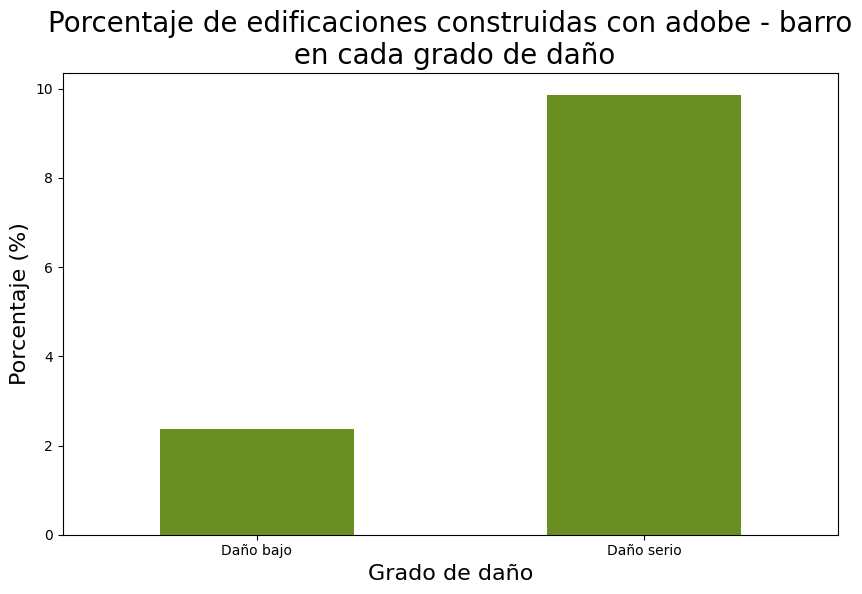

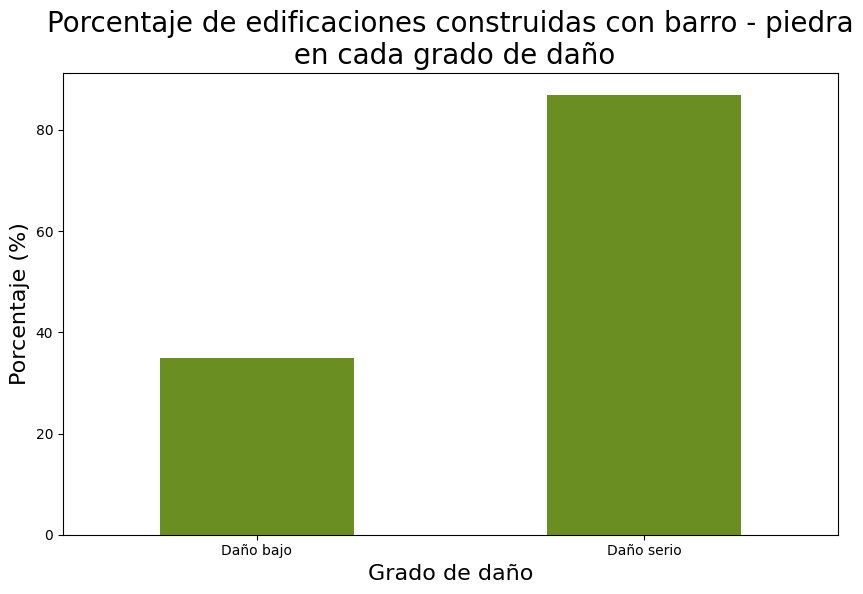

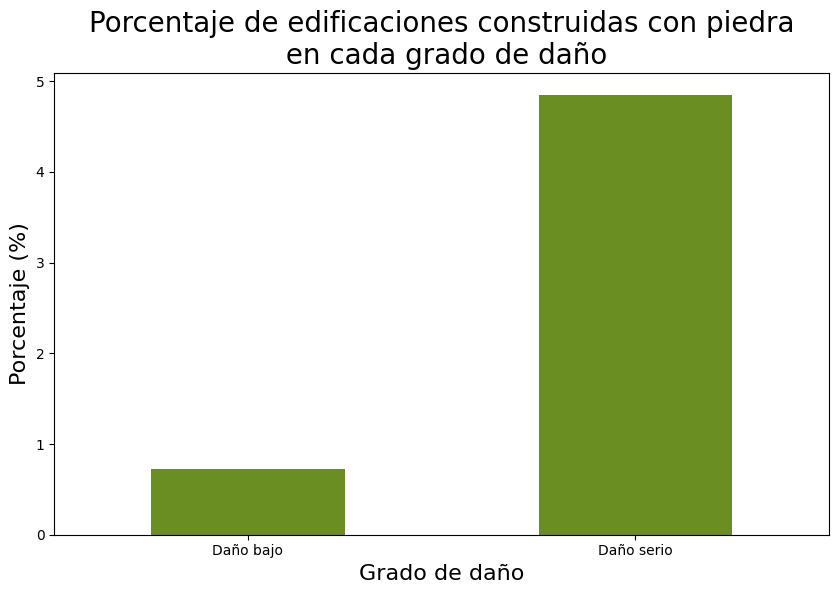

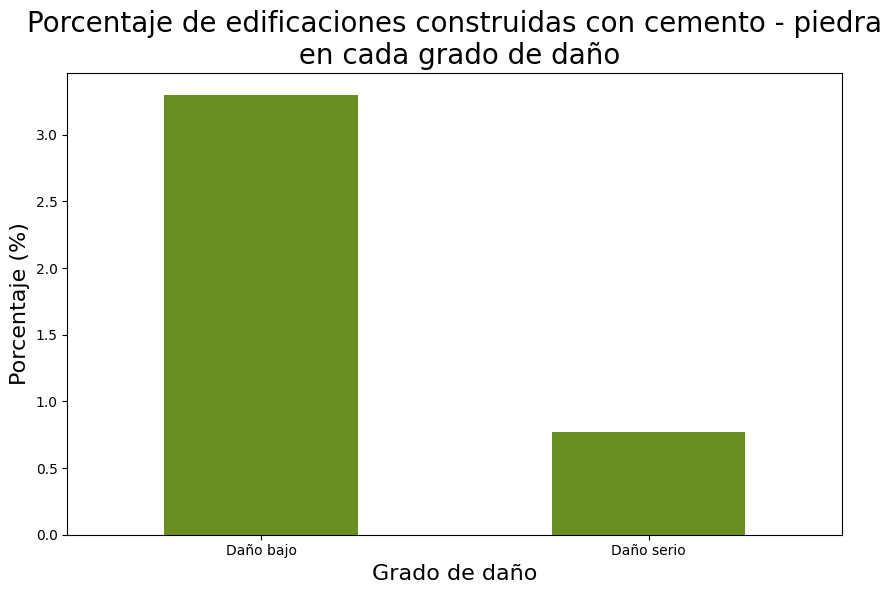

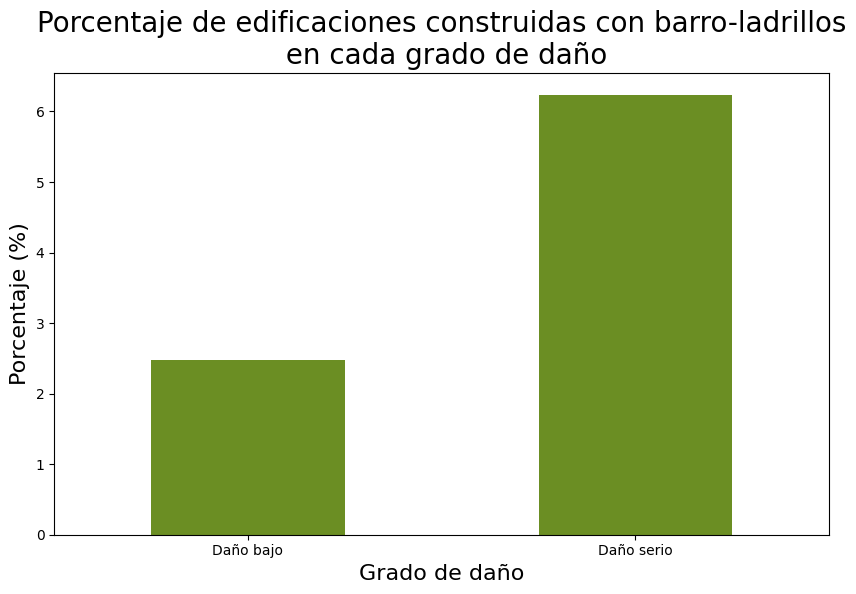

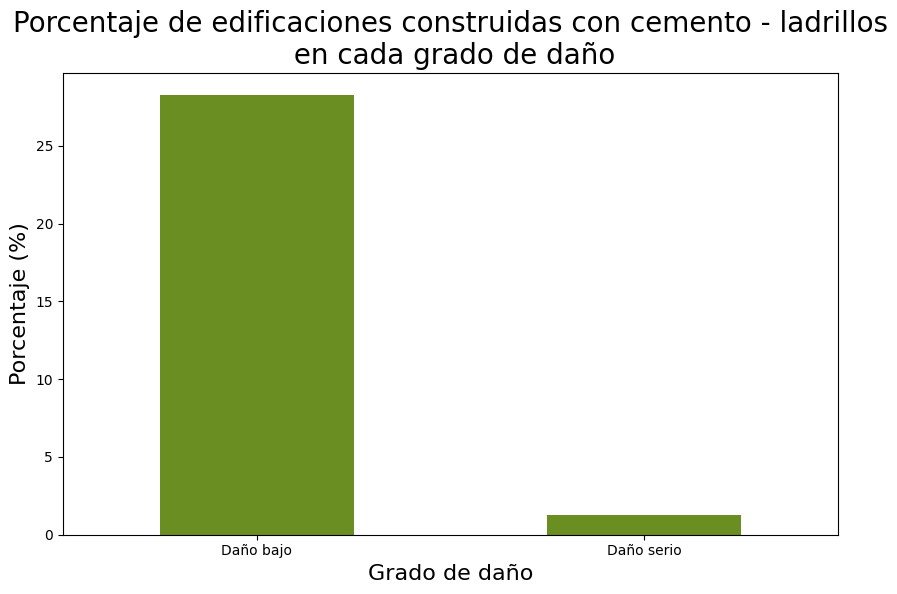

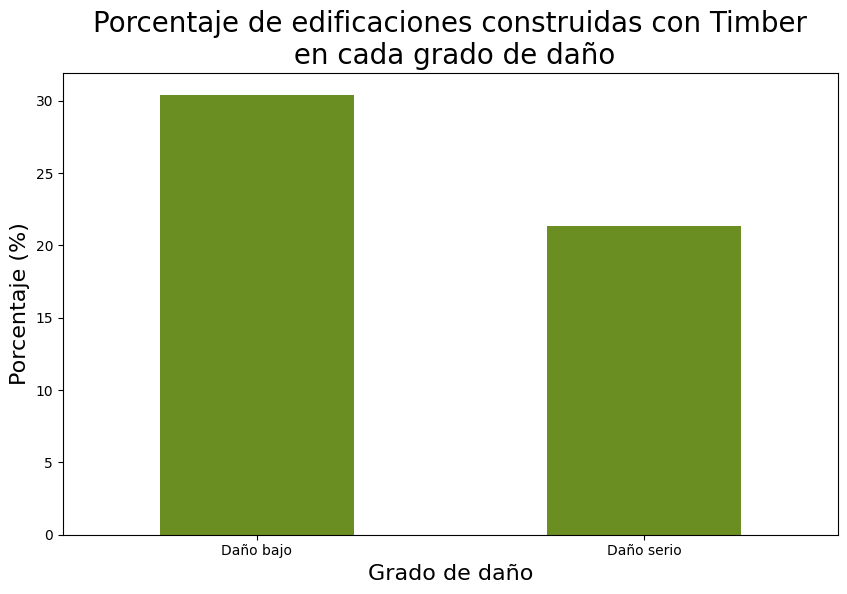

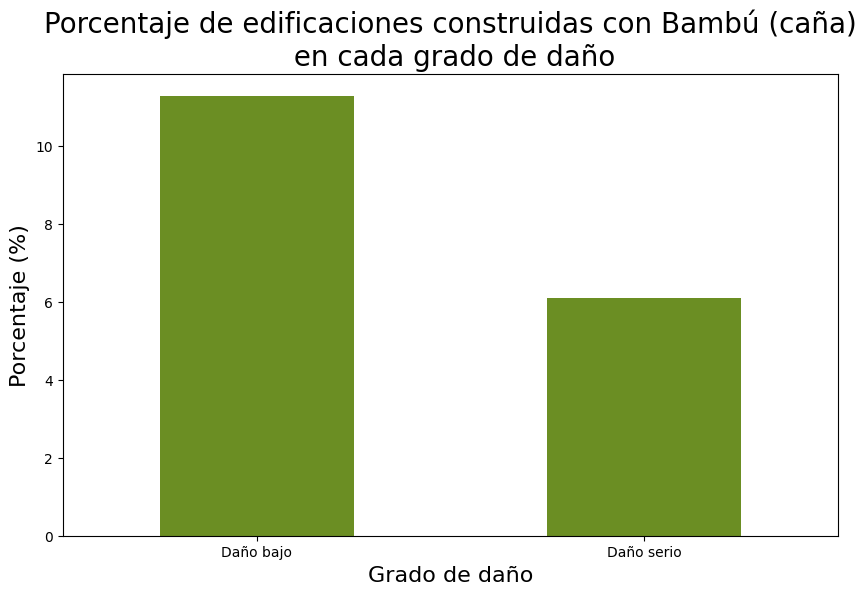

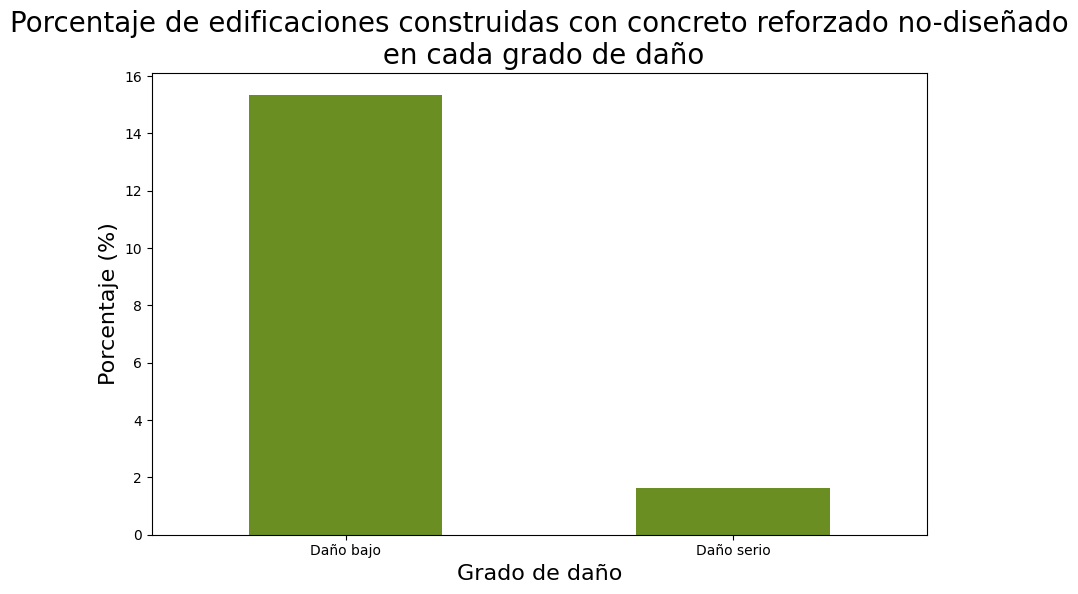

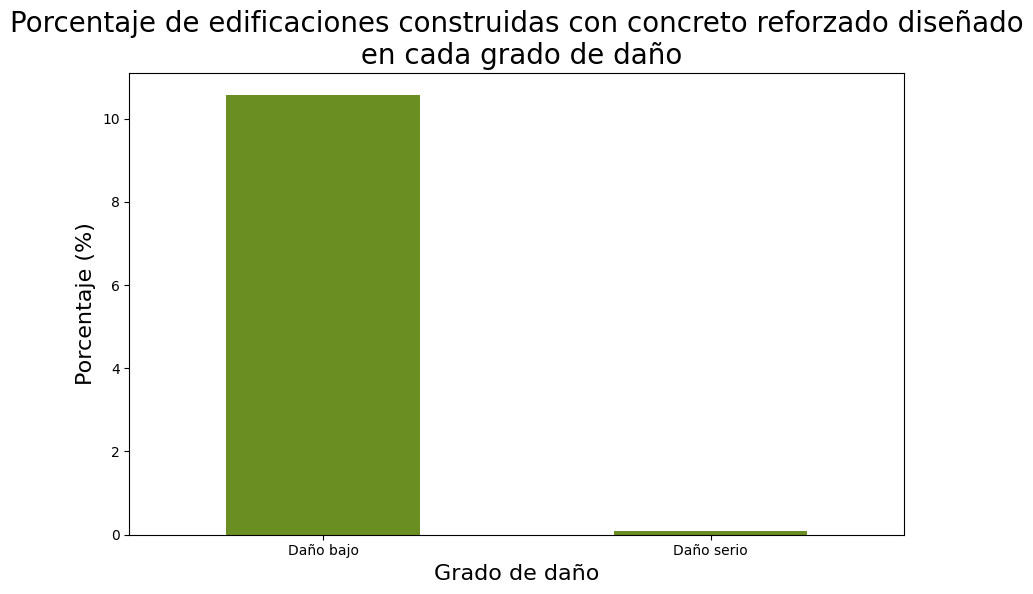

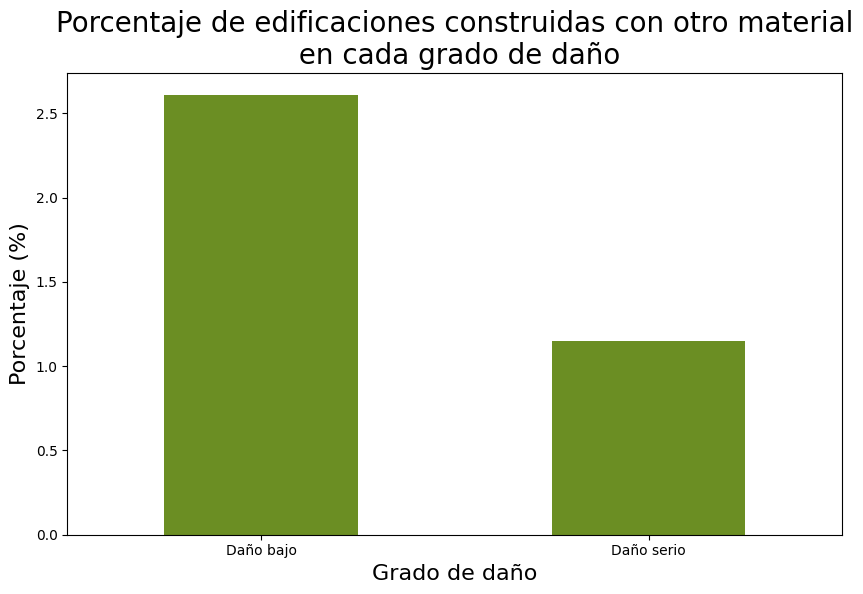

In [12]:
for i in range (0,len(superstructure_bools)):
    g = porcentajes_para_graficar.loc[:,superstructure_bools[i]]\
    .plot(kind='bar', linewidth=150, 
                         color='olivedrab',figsize=(10,6), rot=0)
    g.set_title('Porcentaje de edificaciones construidas'
            ' con ' + titulos[i] + '\n en cada grado de daño'
            , fontsize=20)
    g.set_xlabel('Grado de daño', fontsize=16)
    g.set_ylabel('Porcentaje (%)', fontsize=16)
    plt.show()

Conclusiones barro-piedra: 
En este grafico se puede apreciar que mientras que es muy comun que las edificaciones que recibieron daños serios hayan sido construidas con barro-piedra (87%), no lo es tanto para las edificaciones que presentan un bajo nivel de daños (35%). De esto se puede concluir que las construcciones de este tipo no tendieron a mitigar bien los daños.

Conclusiones cemento - ladrillos: En este caso se puede ver que en las edificaciones que recibieron un bajo nivel de daños, es mucho mas comun que hayan sido construidas con cemento - ladrillos que en las que recibieron daños serios (28% contra 1%). De esto se puede concluir que este tipo de construcciones ayudo a mitigar los daños.

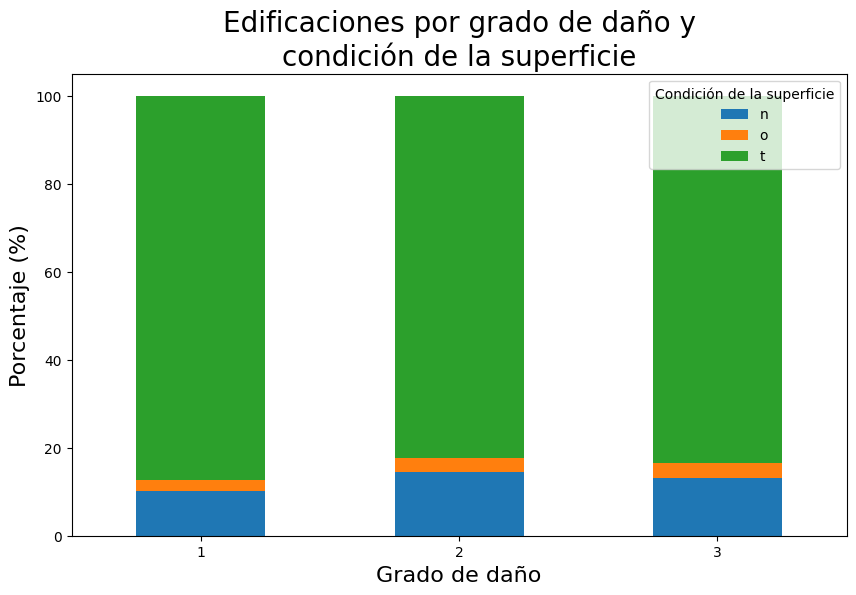

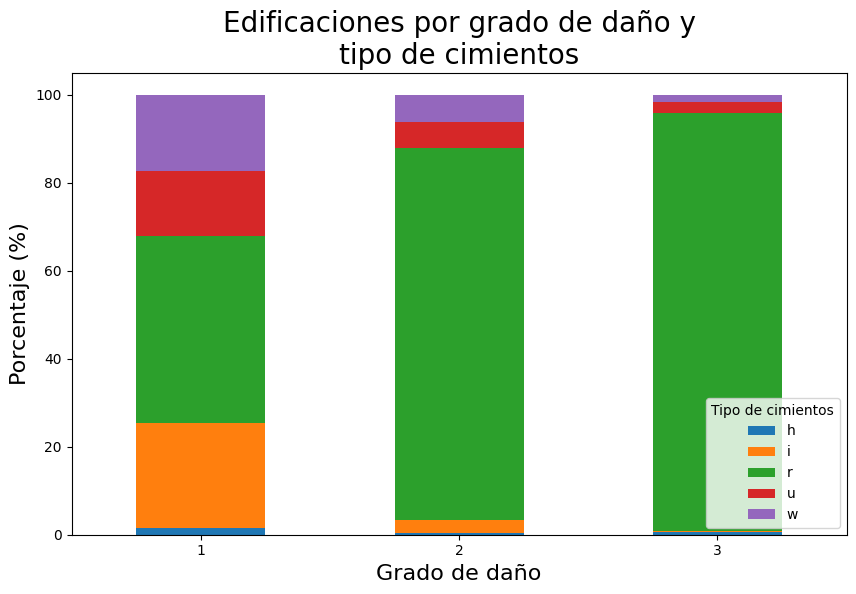

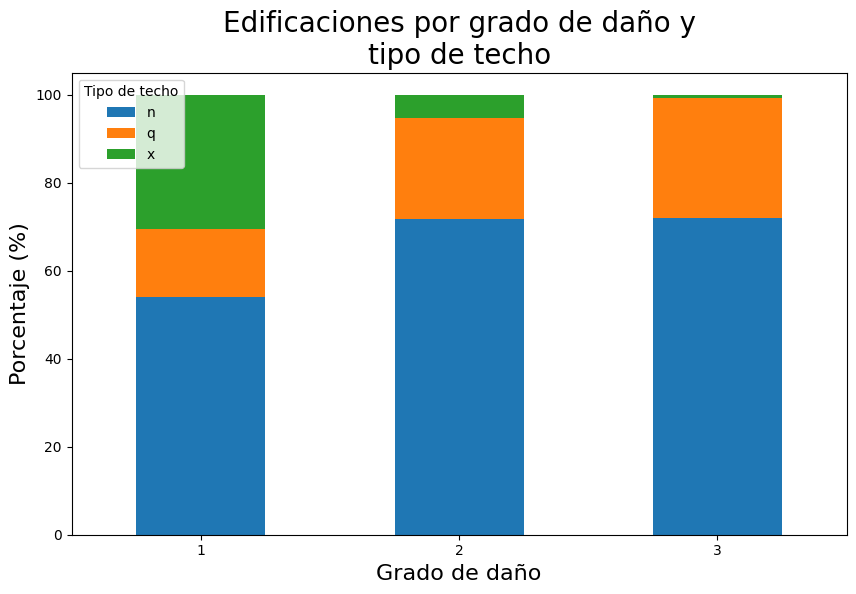

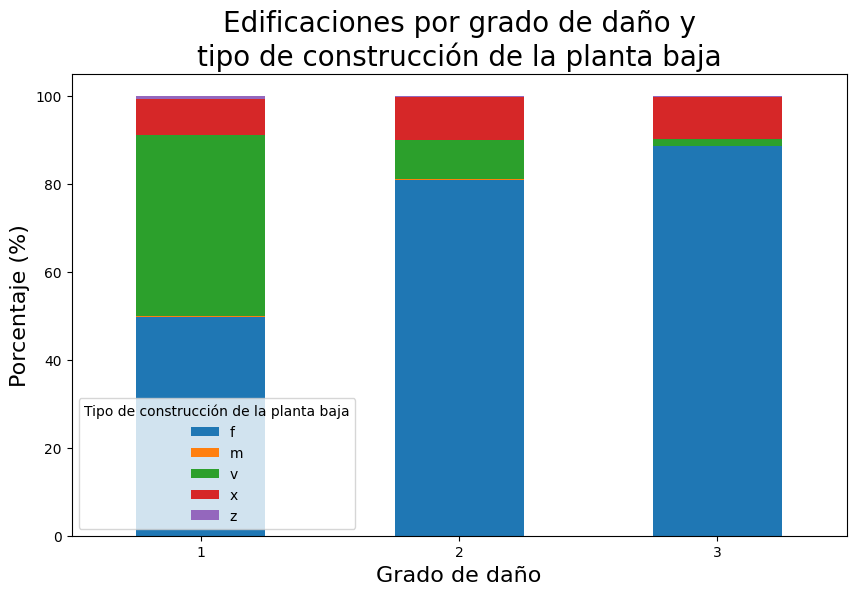

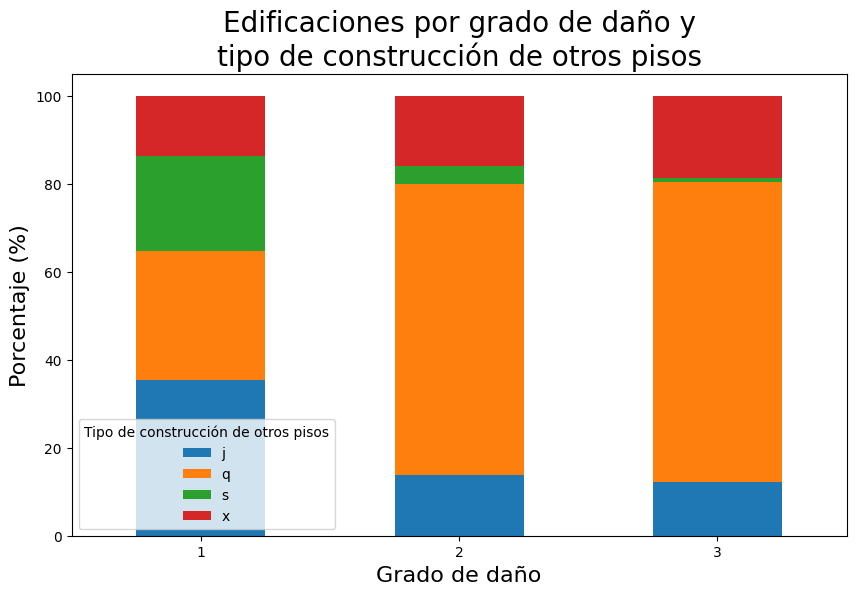

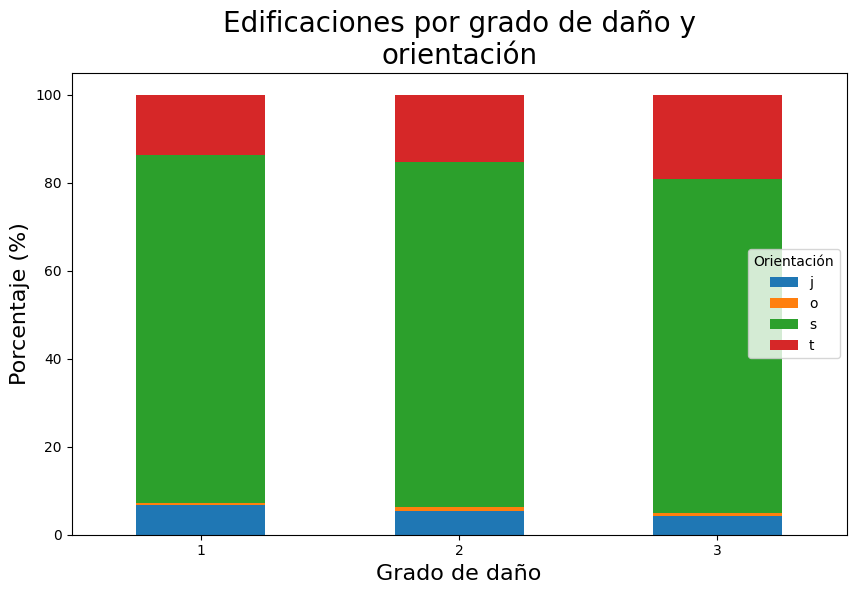

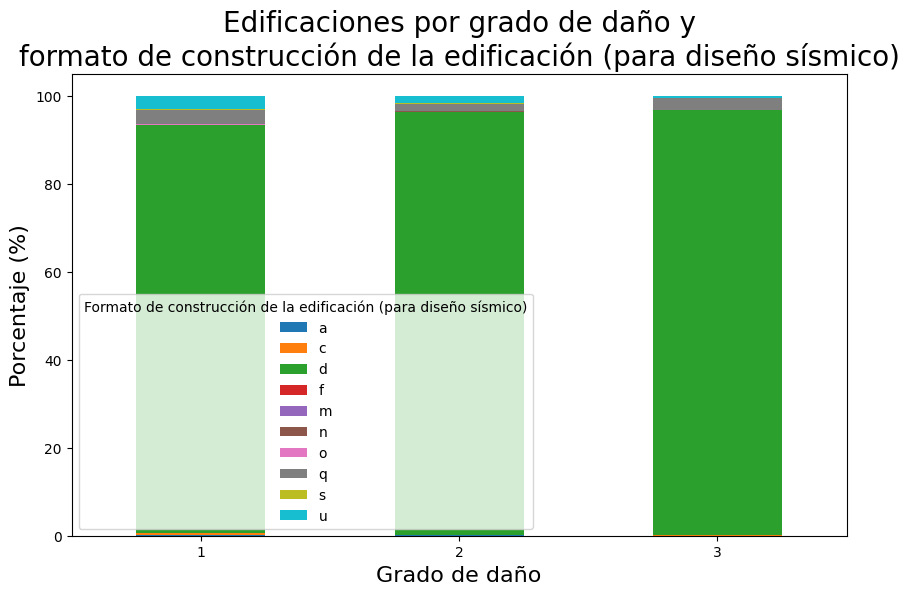

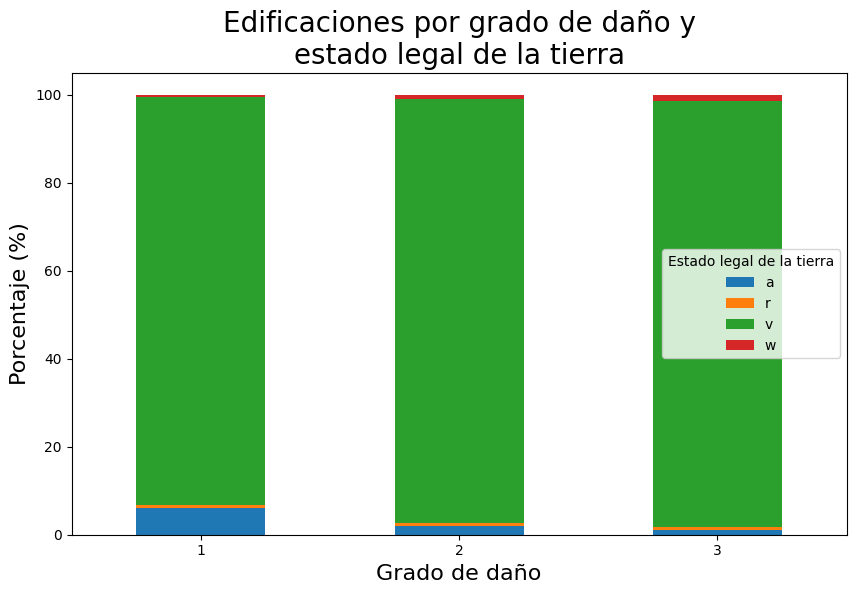

In [3]:
def graficarPorcentajesDeCategoricos(serie, titulo):
    serie = serie.value_counts(normalize=True) * 100
    g = serie.unstack(1).plot(kind='bar', stacked=True,
                              rot=0, figsize=(10,6))
    g.set_title('Edificaciones por grado de daño y\n' + titulo,
               fontsize=20)
    g.set_xlabel('Grado de daño', fontsize=16)
    g.set_ylabel('Porcentaje (%)', fontsize=16)
    plt.legend(title=titulo.capitalize())
    plt.show()

agrupados = values.groupby('damage_grade')

graficarPorcentajesDeCategoricos(agrupados.land_surface_condition, 
                'condición de la superficie')
graficarPorcentajesDeCategoricos(agrupados.foundation_type, 
                                  'tipo de cimientos')
graficarPorcentajesDeCategoricos(agrupados.roof_type, 
                                  'tipo de techo')
graficarPorcentajesDeCategoricos(agrupados.ground_floor_type, 
            'tipo de construcción de la planta baja')
graficarPorcentajesDeCategoricos(agrupados.other_floor_type, 
            'tipo de construcción de otros pisos')
graficarPorcentajesDeCategoricos(agrupados.position, 
                                  'orientación')
graficarPorcentajesDeCategoricos(agrupados.plan_configuration, 
    'formato de construcción de la edificación (para diseño sísmico)')
graficarPorcentajesDeCategoricos(agrupados.legal_ownership_status, 
                            'estado legal de la tierra')